<a href="https://colab.research.google.com/github/Wasim-Zaman/deep_learning_with_tensorflow/blob/main/001_Deep_Learning_Regression_In_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Regression

## Regression Problem

Before starting what a regression problem is, first we need to know that there are literally two kinds of problem in machine learning that we face:

* Classification problem
* Regression Problem

There could be a lot of definitions for these two problems, but the most simplest could be:

**Classificaiton Problem**

A kind of problem in which we predict non-number  (non-numeriacal discrete value) value like identifying something's category is known as classification problem.
 * For example predicting whether the aniaml you are actually seeing is dog or cat

**Regression Problem**

A kind of problem in which we predict a number (a continuous value) is known as regression problem
* For example predicting the salary of a persion, or predicting the price of a house.


This notebook is all about the regression problems, not about classification problems. And all we are going to do in this slide is that we're going to set the foundations for how you can take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.


## Data to work on

In [1]:
# creting a data so that we can later on create our neural network model
import numpy as np
import pandas as pd
import tensorflow as tf

data = pd.DataFrame(
    {"Features":tf.range(-13, 1323, 10), "Labels":(tf.range(-13, 1323, 10) + 7)}
)

# Checking the head of the dataframe
data.head(13)

,Features,Labels
0,-13,-6
1,-3,4
2,7,14
3,17,24
4,27,34
5,37,44
6,47,54
7,57,64
8,67,74
9,77,84


Now that we have some kind of data to work on, it is always applicable to process the data

Processing the data means that we need to split the data first into Features and Labels, features are the input  we feed into the model and labels are what we predict from the model.

We call features as X and labels as y and dealing with the data in this way is called data pre-processing


## Data Preprocessing

In [2]:
# spliting the data into X and y
X = data['Features'].values
y = data['Labels'].values

X, y

(array([ -13,   -3,    7,   17,   27,   37,   47,   57,   67,   77,   87,
          97,  107,  117,  127,  137,  147,  157,  167,  177,  187,  197,
         207,  217,  227,  237,  247,  257,  267,  277,  287,  297,  307,
         317,  327,  337,  347,  357,  367,  377,  387,  397,  407,  417,
         427,  437,  447,  457,  467,  477,  487,  497,  507,  517,  527,
         537,  547,  557,  567,  577,  587,  597,  607,  617,  627,  637,
         647,  657,  667,  677,  687,  697,  707,  717,  727,  737,  747,
         757,  767,  777,  787,  797,  807,  817,  827,  837,  847,  857,
         867,  877,  887,  897,  907,  917,  927,  937,  947,  957,  967,
         977,  987,  997, 1007, 1017, 1027, 1037, 1047, 1057, 1067, 1077,
        1087, 1097, 1107, 1117, 1127, 1137, 1147, 1157, 1167, 1177, 1187,
        1197, 1207, 1217, 1227, 1237, 1247, 1257, 1267, 1277, 1287, 1297,
        1307, 1317], dtype=int32),
 array([  -6,    4,   14,   24,   34,   44,   54,   64,   74,   84,   94,
   

In [3]:
# Checking the shape of X and y

X[0].shape, y[0].shape

((), ())

If you have a machine learning background, we also split the data into train and test data, so that we can train our model on the training data and then test our data on the data which it has never seen before which means (test data)

## Splitting the data into train and test data

In [58]:
X_train, X_test = X[:100], X[100:]

y_train, y_test = y[:100], y[100:]

In [59]:
# Checking the shape

X_train.shape, y_train.shape

((100,), (100,))

## Steps in creating a model

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [60]:
from tensorflow.python import metrics
import tensorflow as tf

# setting a random seed
tf.random.set_seed(42)

# creating a model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compiling a model
model1.compile (
    loss = "mae",
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae'],
)

# fitting the model
model1.fit (tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 4ms/step - loss: 924.2548 - mae: 924.2548
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 1073.6990 - mae: 1073.6990
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 1377.5419 - mae: 1377.5419
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 1405.5095 - mae: 1405.5095
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 1415.4742 - mae: 1415.4742
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 1408.1301 - mae: 1408.1301
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 1741.1725 - mae: 1741.1725
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 1443.4038 - mae: 1443.4038
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 1317.9458 - mae: 1317.9458
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 1553.5305 - mae: 1553.5305


In [61]:
model1.predict(X_test)

2/2 [==============================] - 0s 7ms/step


array([[ -865.4234 ],
       [ -874.1916 ],
       [ -882.9597 ],
       [ -891.7279 ],
       [ -900.49603],
       [ -909.2642 ],
       [ -918.03235],
       [ -926.80054],
       [ -935.56866],
       [ -944.33685],
       [ -953.105  ],
       [ -961.87317],
       [ -970.6413 ],
       [ -979.4095 ],
       [ -988.1776 ],
       [ -996.9458 ],
       [-1005.7139 ],
       [-1014.4821 ],
       [-1023.25024],
       [-1032.0184 ],
       [-1040.7866 ],
       [-1049.5547 ],
       [-1058.3229 ],
       [-1067.0911 ],
       [-1075.8593 ],
       [-1084.6273 ],
       [-1093.3955 ],
       [-1102.1637 ],
       [-1110.9319 ],
       [-1119.7    ],
       [-1128.4681 ],
       [-1137.2363 ],
       [-1146.0045 ],
       [-1154.7726 ]], dtype=float32)

## Predicting labels 

Honestly we have trained and fitted our model based on the taining data, and now we want to test its behavior on the test data, what we will do is to predict the value of y based on the x test data.

Similarly we will then compare the predictions with the actual y_test values to ensure the correctness of the model we have.

In [62]:
y_preds = model1.predict([100])

1/1 [==============================] - 0s 58ms/step


We can see that our model is not performing well, this needs to be improved but how to improve our model 

# Improving the model

In order to improve our model, we alter most every part of the three steps

* Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
* Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
* Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).


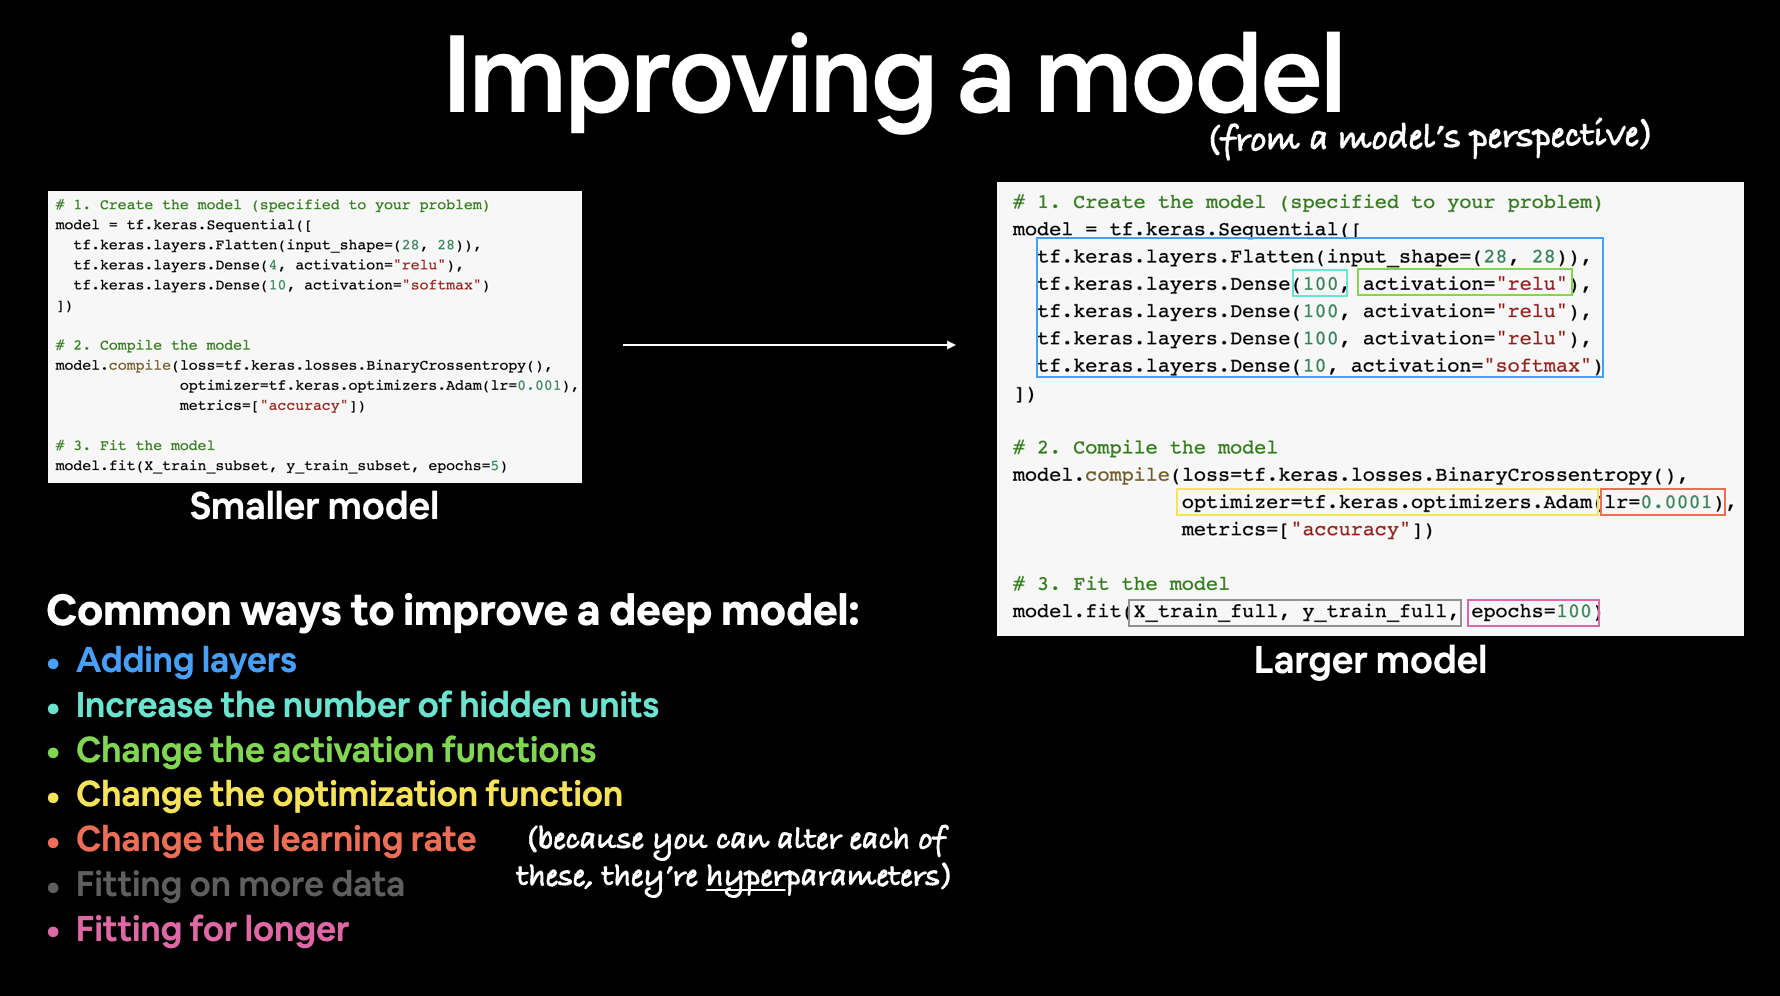

## Fitting for more

In [63]:
# creating model 2

X_train = tf.expand_dims(X_train, axis=-1)
X_test = tf.expand_dims(X_test, axis=-1)

tf.random.set_seed(42)

# creating model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compiling the model
model2.compile(
    loss='mae',
    optimizer='sgd',
    metrics=['mae']
)

# fitting the model
model2.fit(x=X_train, y=y_train, epochs=100)


Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 924.2548 - mae: 924.2548
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1073.6990 - mae: 1073.6990
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1377.5419 - mae: 1377.5419
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1405.5095 - mae: 1405.5095
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1415.4742 - mae: 1415.4742
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1408.1301 - mae: 1408.1301
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 1741.1725 - mae: 1741.1725
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1443.4038 - mae: 1443.4038
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 1317.9458 - mae: 1317.9458
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1553.5305 - mae: 1553.5305
Epoch 11/100
4/4 [===

## Evaluating the model
It is always a good practice to visualize what is happening which evaluating the data, Some of the ways to do this are:

* calling the evaluate method of the model
* calling the summary method of the model
* ploting the 2d plot of the model
* but the most popular way is to plot model predictions

In [64]:
# checking the summary of the model
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [65]:
# evaluating the model
model2.evaluate(X_train, y_train)

4/4 [==============================] - 0s 3ms/step - loss: 3234.2424 - mae: 3234.2424


[3234.242431640625, 3234.242431640625]

## ploting the model's predictions 

In [66]:
def plot_model_predictions(train_data = X_train, train_labels=y_train,
                           test_data = X_test, test_labels = y_test,
                           predictions = y_preds):
  
  '''
  Plots the model train data, test data, and model's prediction against the test data
  '''
  import matplotlib.pyplot as plt
  
  # Setting the figure size
  plt.figure(figsize = (10, 7))
  # ploting the train data
  plt.scatter(train_data, train_labels, c='blue', label='training data')
  # ploting the test data
  plt.scatter(test_data, test_labels, c='green', label='test data')
  # ploting the predictions
  plt.scatter(test_data, predictions, c = 'red', label='predictions')
  # show the legend
  plt.legend();


In [67]:
# make predictions
y_preds2 = model2.predict(X_test)
y_preds2

2/2 [==============================] - 0s 4ms/step


array([[ 7619.1274],
       [ 7696.322 ],
       [ 7773.516 ],
       [ 7850.7104],
       [ 7927.905 ],
       [ 8005.099 ],
       [ 8082.2935],
       [ 8159.488 ],
       [ 8236.682 ],
       [ 8313.876 ],
       [ 8391.07  ],
       [ 8468.265 ],
       [ 8545.459 ],
       [ 8622.653 ],
       [ 8699.848 ],
       [ 8777.042 ],
       [ 8854.236 ],
       [ 8931.431 ],
       [ 9008.625 ],
       [ 9085.819 ],
       [ 9163.014 ],
       [ 9240.208 ],
       [ 9317.402 ],
       [ 9394.597 ],
       [ 9471.791 ],
       [ 9548.985 ],
       [ 9626.18  ],
       [ 9703.374 ],
       [ 9780.568 ],
       [ 9857.763 ],
       [ 9934.957 ],
       [10012.151 ],
       [10089.346 ],
       [10166.54  ]], dtype=float32)

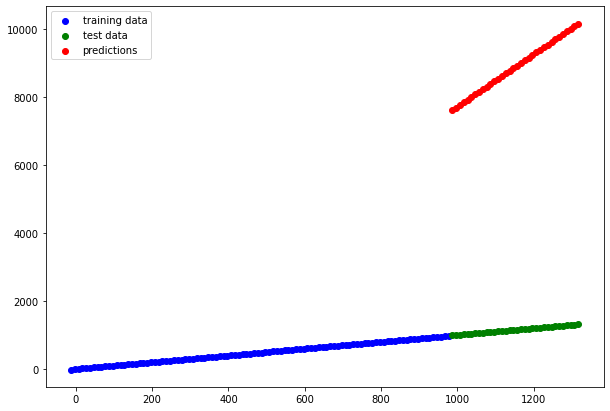

In [68]:
# plot model's predictions
plot_model_predictions(predictions=y_preds2)

OH.......

This is not fair...... we can see that our model is not predicting well, which means that the error rate is too high...
But for its improvement we train it for more number of epochs.. but all in vain